In [1]:
import pandas as pd
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt

# connect to your MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="newpassword",   # replace
    database="Superstore"
)

# pull data into pandas
df = pd.read_sql("SELECT * FROM superstore_sales", conn)

# check the top rows
print(df.head())


/var/folders/0t/vc47nm097dj_h4nf86hz_7jw0000gn/T/ipykernel_66475/116749155.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM superstore_sales", conn)


   row_id        order_id  order_date   ship_date       ship_mode customer_id  \
0       1  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688  2016-06-12  2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   

     customer_name    segment        country             city  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  postal_code region       product_id         category sub_category  \
0       42420  South 

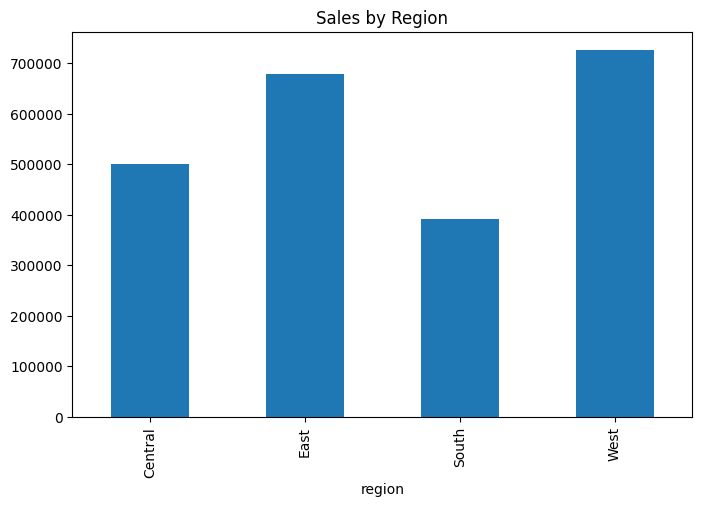

In [3]:
region_sales = df.groupby("region")["sales"].sum()
region_sales.plot(kind="bar", figsize=(8,5), title="Sales by Region")
plt.show()


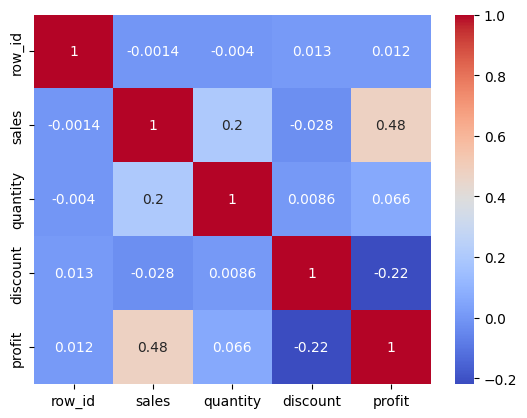

In [5]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# then plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()


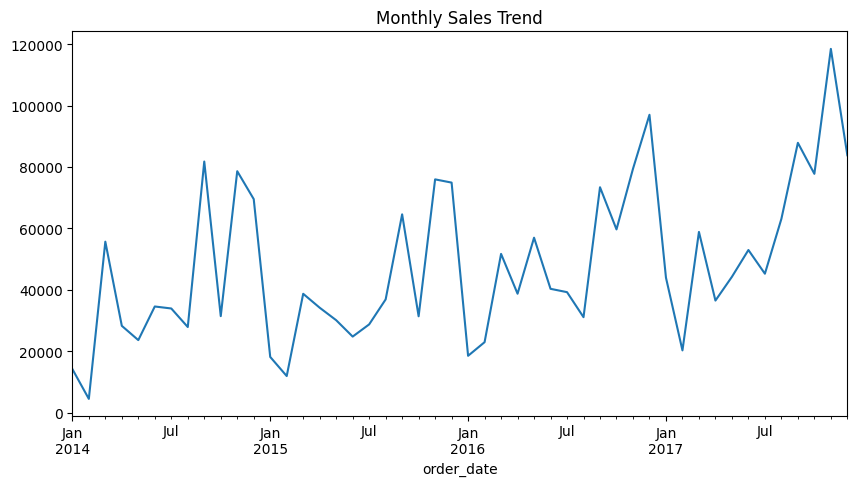

In [6]:
df['order_date'] = pd.to_datetime(df['order_date'])
monthly = df.groupby(df['order_date'].dt.to_period('M'))['sales'].sum()
monthly.index = monthly.index.to_timestamp()
monthly.plot(figsize=(10,5), title="Monthly Sales Trend")
plt.show()


In [2]:
df.to_csv("superstore_cleaned.csv", index=False)
